In [9]:
import os
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "False"

import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Advection-Diffusion-Reaction
def solve_ADR(xmin, xmax, tmin, tmax, k, v, g, dg, f, u0, Nx, Nt):
    """Solve 1D
    u_t = (k(x) u_x)_x - v(x) u_x + g(u) + f(x, t)
    with zero boundary condition.
    """
    x = np.linspace(xmin, xmax, Nx)
    t = np.linspace(tmin, tmax, Nt)
    h = x[1] - x[0]
    dt = t[1] - t[0]
    h2 = h**2

    D1 = np.eye(Nx, k=1) - np.eye(Nx, k=-1)
    D2 = -2 * np.eye(Nx) + np.eye(Nx, k=-1) + np.eye(Nx, k=1)
    D3 = np.eye(Nx - 2)
    k = k(x)
    M = -np.diag(D1 @ k) @ D1 - 4 * np.diag(k) @ D2
    m_bond = 8 * h2 / dt * D3 + M[1:-1, 1:-1]
    v = v(x)
    v_bond = 2 * h * np.diag(v[1:-1]) @ D1[1:-1, 1:-1] + 2 * h * np.diag(
        v[2:] - v[: Nx - 2]
    )
    mv_bond = m_bond + v_bond
    c = 8 * h2 / dt * D3 - M[1:-1, 1:-1] - v_bond
    f = f(x[:, None], t)

    u = np.zeros((Nx, Nt))
    u[:, 0] = u0(x)
    for i in range(Nt - 1):
        gi = g(u[1:-1, i])
        dgi = dg(u[1:-1, i])
        h2dgi = np.diag(4 * h2 * dgi)
        A = mv_bond - h2dgi
        b1 = 8 * h2 * (0.5 * f[1:-1, i] + 0.5 * f[1:-1, i+1] + gi)
        b2 = (c - h2dgi) @ u[1:-1, i].T
        u[1:-1, i + 1] = np.linalg.solve(A, b1 + b2)
    return x, t, u

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


2023-11-16 03:01:48.316379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 03:01:48.323143: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 03:01:48.323395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Enable just-in-time compilation with XLA.


Compiling model...
Building DeepONet...
'build' took 0.056812 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/deeponet.py:187: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-11-16 03:01:51.601076: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 03:01:51.603182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 03:01:51.603571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may ha

'compile' took 0.975120 s

Initializing variables...
Training model...



2023-11-16 03:01:52.526143: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-11-16 03:01:52.629453: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7fed0c2169b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-16 03:01:52.629499: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-16 03:01:52.645208: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-16 03:02:00.088443: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                        Test loss                         Test metric
0         [1.33e+00, 1.46e-01, 7.76e-02]    [1.27e+00, 1.46e-01, 7.76e-02]    []  


2023-11-16 03:02:12.854645: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


1000      [5.28e-02, 4.29e-02, 9.19e-03]    [4.43e-02, 4.29e-02, 9.19e-03]    []  
2000      [1.35e-02, 6.04e-03, 1.67e-03]    [1.12e-02, 6.04e-03, 1.67e-03]    []  
3000      [6.23e-03, 1.44e-03, 8.55e-04]    [5.96e-03, 1.44e-03, 8.55e-04]    []  
4000      [3.86e-03, 8.34e-04, 5.49e-04]    [3.89e-03, 8.34e-04, 5.49e-04]    []  
5000      [3.14e-03, 6.13e-04, 4.23e-04]    [3.27e-03, 6.13e-04, 4.23e-04]    []  
6000      [2.70e-03, 5.15e-04, 3.96e-04]    [2.91e-03, 5.15e-04, 3.96e-04]    []  
7000      [2.14e-03, 5.67e-04, 5.66e-04]    [2.31e-03, 5.67e-04, 5.66e-04]    []  
8000      [1.47e-03, 3.36e-04, 2.89e-04]    [1.62e-03, 3.36e-04, 2.89e-04]    []  
9000      [1.11e-03, 3.46e-04, 2.43e-04]    [1.19e-03, 3.46e-04, 2.43e-04]    []  
10000     [9.09e-04, 2.86e-04, 2.46e-04]    [9.72e-04, 2.86e-04, 2.46e-04]    []  
11000     [9.44e-04, 6.36e-04, 6.58e-04]    [1.01e-03, 6.36e-04, 6.58e-04]    []  
12000     [7.82e-04, 2.44e-04, 1.93e-04]    [8.46e-04, 2.44e-04, 1.93e-04]    []  
1300

ValueError: operands could not be broadcast together with shapes (48,) (98,) 

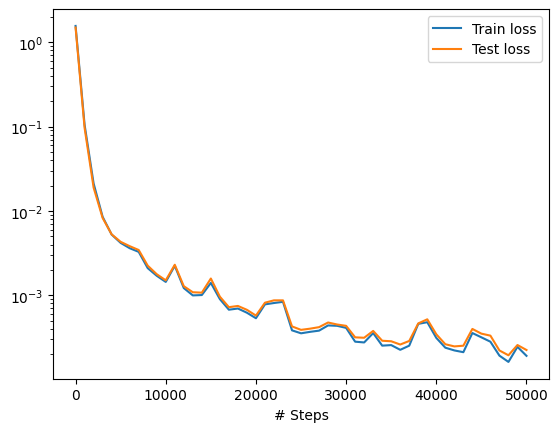

In [1]:
"""Solve 1D Advection-Diffusion-Reaction
u_t = (k(x) u_x)_x - v(x) u_x + g(u) + f(x, t)
with zero boundary condition.
"""

# PDE
def pde(x, y, v):
    D = 0.01
    k = 0.01
    dy_t = dde.grad.jacobian(y, x, j=1)
    dy_xx = dde.grad.hessian(y, x, j=0)
    return dy_t - D * dy_xx + k * y**2 - v


geom = dde.geometry.Interval(0, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, lambda _: 0, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, lambda _: 0, lambda _, on_initial: on_initial)

pde = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=200,
    num_boundary=40,
    num_initial=20,
    num_test=500,
)

# Function space
func_space = dde.data.GRF(length_scale=0.2)

# Data
eval_pts = np.linspace(0, 1, num=50)[:, None]
data = dde.data.PDEOperator(
    pde, func_space, eval_pts, 1000, function_variables=[0], num_test=1000
)

# Net
net = dde.nn.DeepONet(
    [50, 64, 64, 64],
    [2, 64, 64, 64],
    "tanh",
    "Glorot normal",
)

model = dde.Model(data, net)
model.compile("adam", lr=0.0005)
losshistory, train_state = model.train(iterations=50000)

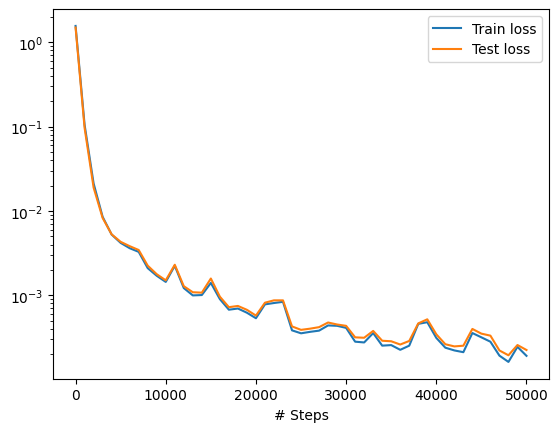

In [2]:
dde.utils.plot_loss_history(losshistory)

0.011709783305818613


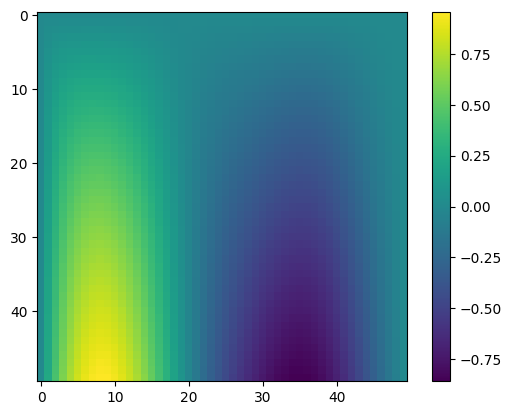

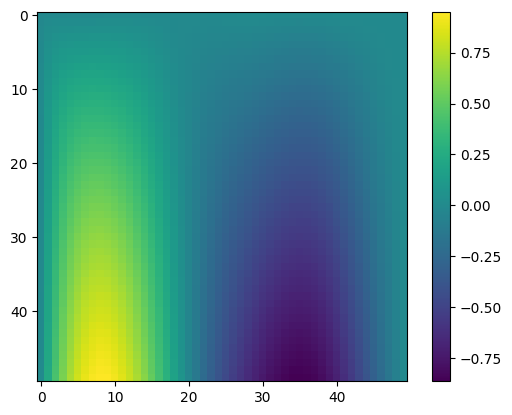

In [16]:
func_feats = func_space.random(1)
xs = np.linspace(0, 1, num=50)[:, None]
v = func_space.eval_batch(func_feats, xs)[0]
x, t, u_true = solve_ADR(
    0,
    1,
    0,
    1,
    lambda x: 0.01 * np.ones_like(x),
    lambda x: np.zeros_like(x),
    lambda u: 0.01 * u**2,
    lambda u: 0.02 * u,
    lambda x, t: np.tile(v[:, None], (1, len(t))),
    lambda x: np.zeros_like(x),
    50,
    50,
)
u_true = u_true.T
plt.figure()
plt.imshow(u_true)
plt.colorbar()

v_branch = func_space.eval_batch(func_feats, np.linspace(0, 1, num=50)[:, None])[0]
xv, tv = np.meshgrid(x, t)
x_trunk = np.vstack((np.ravel(xv), np.ravel(tv))).T
u_pred = model.predict((np.tile(v_branch, (50 * 50, 1)), x_trunk))
u_pred = u_pred.reshape((50, 50))
print(dde.metrics.l2_relative_error(u_true, u_pred))
plt.figure()
plt.imshow(u_pred)
plt.colorbar()
plt.show()